In [1]:
import os
import pandas as pandas
import matplotlib.pyplot as plt
import numpy as np
import torch 

In [25]:
real_data = pandas.read_csv('./data/electric/normal.csv')
print(real_data.shape)
real_data.head()

(2208, 6)


,precio,demanda,porcentaje,eolica,hidraulica,solar
0,42.96,23328,61.078345,6098.833333,721.833333,24.666667
1,39.27,21968,62.006787,5822.500000,420.166667,24.000000
2,34.58,21105,62.019082,6019.666667,-80.833333,24.000000
3,34.39,20452,60.294875,5669.500000,-226.500000,24.333333
4,34.30,20045,59.311723,4969.000000,12.333333,24.000000


In [60]:
shape = (int(real_data.shape[0]/24), 24, real_data.shape[1])
data_batch = np.zeros(shape=shape)
for i, j in enumerate(range(0, shape[0]-24, 24)):
    data_batch[i,:,:] = real_data.iloc[j:j+24,:]

data_batch.shape

(92, 24, 6)

In [61]:
data_batch[1]

array([[4.76300000e+01, 2.32220000e+04, 5.11903235e+01, 3.18783333e+03,
        1.24483333e+03, 3.35000000e+01],
       [4.68100000e+01, 2.21190000e+04, 5.08692814e+01, 2.90000000e+03,
        8.88333333e+02, 3.30000000e+01],
       [4.35900000e+01, 2.13590000e+04, 4.94068627e+01, 2.49066667e+03,
        6.65500000e+02, 3.26666667e+01],
       [4.22800000e+01, 2.10760000e+04, 4.82721733e+01, 2.18216667e+03,
        5.76166667e+02, 3.16666667e+01],
       [4.13300000e+01, 2.09770000e+04, 4.64874145e+01, 1.86633333e+03,
        5.79666667e+02, 3.11666667e+01],
       [4.26700000e+01, 2.15480000e+04, 4.56764958e+01, 1.72616667e+03,
        7.40833333e+02, 3.18333333e+01],
       [4.94500000e+01, 2.42150000e+04, 4.52297942e+01, 1.58800000e+03,
        2.17750000e+03, 3.13333333e+01],
       [5.22300000e+01, 2.74160000e+04, 4.62769173e+01, 1.57183333e+03,
        4.17916667e+03, 3.16666667e+01],
       [5.47800000e+01, 2.93020000e+04, 4.62993007e+01, 1.54150000e+03,
        4.85533333e+03, 

In [26]:
samples = torch.load('samples/sample_0.pt')[:,:,:,0].cpu().numpy()

In [54]:
print(data_batch[3,:,0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


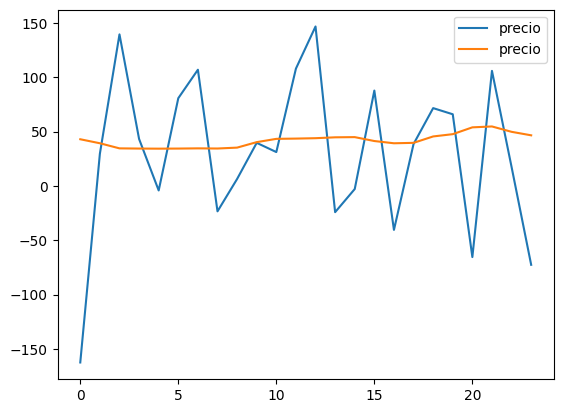

In [63]:
ts = 0
plt.figure()
plt.plot(samples[ts,:,0],label='precio')
plt.plot(data_batch[ts,:,0],label='precio')
plt.legend()
plt.show()

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [39]:
lenght = 100
c = 100
column = np.linspace(0, 1, lenght).reshape((-1,1))
data = np.concatenate([column for _ in range(c)], axis=1)

data.shape
data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
        0.01010101],
       [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
        0.02020202],
       ...,
       [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
        0.97979798],
       [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
        0.98989899],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [57]:
frecuencies = np.linspace(0,1,lenght//2)

frecuencia_angular = 2*np.pi/frecuencies
frecuencia_angular


/tmp/ipykernel_10298/948111100.py:3: RuntimeWarning: divide by zero encountered in divide
  frecuencia_angular = 2*np.pi/frecuencies


array([         inf, 307.87608005, 153.93804003, 102.62536002,
        76.96902001,  61.57521601,  51.31268001,  43.98229715,
        38.48451001,  34.20845334,  30.78760801,  27.98873455,
        25.65634   ,  23.68277539,  21.99114858,  20.525072  ,
        19.242255  ,  18.11035765,  17.10422667,  16.20400421,
        15.393804  ,  14.66076572,  13.99436728,  13.38591652,
        12.82817   ,  12.3150432 ,  11.84138769,  11.40281778,
        10.99557429,  10.61641655,  10.262536  ,   9.93148645,
         9.6211275 ,   9.32957818,   9.05517883,   8.79645943,
         8.55211333,   8.32097514,   8.10200211,   7.89425846,
         7.696902  ,   7.50917268,   7.33038286,   7.15990884,
         6.99718364,   6.84169067,   6.69295826,   6.55055489,
         6.414085  ,   6.28318531])

In [62]:
div_term = 1/(10000**(np.arange(0, lenght, 2) / lenght))
div_term

array([1.00000000e+00, 8.31763771e-01, 6.91830971e-01, 5.75439937e-01,
       4.78630092e-01, 3.98107171e-01, 3.31131121e-01, 2.75422870e-01,
       2.29086765e-01, 1.90546072e-01, 1.58489319e-01, 1.31825674e-01,
       1.09647820e-01, 9.12010839e-02, 7.58577575e-02, 6.30957344e-02,
       5.24807460e-02, 4.36515832e-02, 3.63078055e-02, 3.01995172e-02,
       2.51188643e-02, 2.08929613e-02, 1.73780083e-02, 1.44543977e-02,
       1.20226443e-02, 1.00000000e-02, 8.31763771e-03, 6.91830971e-03,
       5.75439937e-03, 4.78630092e-03, 3.98107171e-03, 3.31131121e-03,
       2.75422870e-03, 2.29086765e-03, 1.90546072e-03, 1.58489319e-03,
       1.31825674e-03, 1.09647820e-03, 9.12010839e-04, 7.58577575e-04,
       6.30957344e-04, 5.24807460e-04, 4.36515832e-04, 3.63078055e-04,
       3.01995172e-04, 2.51188643e-04, 2.08929613e-04, 1.73780083e-04,
       1.44543977e-04, 1.20226443e-04])

In [63]:
data[:,0::2] = np.sin(div_term*data[:,0::2])
data[:,1::2] = np.cos(div_term*data[:,0::2])

In [59]:
np.sin(data[-50,0]*frecuencia_angular[0])

nan

In [60]:
data[:,0::2]


array([[            nan,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [            nan,  5.95384611e-01, -9.59829365e-01, ...,
        -8.11300193e-01, -3.89983169e-01,  9.47168220e-01],
       [            nan, -9.59644419e-01, -4.64697807e-01, ...,
         4.43472987e-02,  3.80577791e-01, -6.46863259e-01],
       ...,
       [            nan,  9.59644419e-01,  4.64697807e-01, ...,
        -4.43472987e-02, -3.80577791e-01,  6.46863259e-01],
       [            nan, -5.95384611e-01,  9.59829365e-01, ...,
         8.11300193e-01,  3.89983169e-01, -9.47168220e-01],
       [            nan, -9.66942355e-15, -1.93388471e-14, ...,
         3.87070179e-13, -4.64132330e-13, -1.31533484e-12]])

In [195]:
lenght = 1000
c = 100

t = np.linspace(0,10,c//2)
t = np.sort(np.concatenate([t,t]))
data = np.zeros((c, lenght))
values_x = np.linspace(1, 100, lenght)
for i in range(0, c, 2):
    w = 2*np.pi*t[i]
    data[i, :] = np.sin(w*values_x)
    data[i+1, :] = np.cos(w*values_x)


In [7]:
import torch
import matplotlib.pyplot as plt

In [5]:
sample1 = torch.load('./samples/sample_0.pt').cpu().numpy()
sample1.shape

(256, 24, 6, 1)

In [6]:
s1 = sample1[0, :, :, 0]
s1.shape

(24, 6)

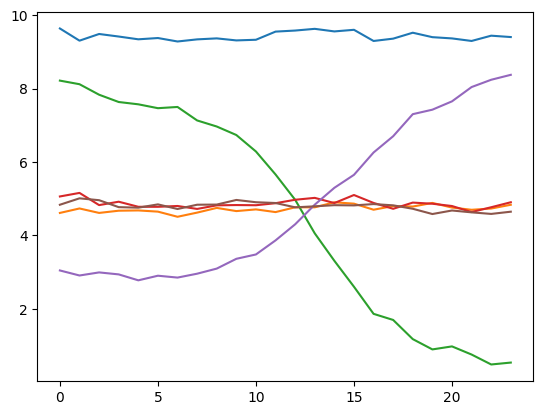

In [12]:
s = sample1[4, :, :, 0]
plt.figure()
plt.plot(s)
plt.show()

In [13]:
s

array([[9.637561  , 4.614033  , 8.217692  , 5.062462  , 3.047573  ,
        4.837008  ],
       [9.305692  , 4.735682  , 8.119561  , 5.1592174 , 2.910168  ,
        5.01172   ],
       [9.487465  , 4.6143227 , 7.833578  , 4.8274856 , 2.9943757 ,
        4.9609466 ],
       [9.418223  , 4.6746902 , 7.635067  , 4.9196897 , 2.940264  ,
        4.771723  ],
       [9.342647  , 4.68216   , 7.5721884 , 4.7812486 , 2.7786498 ,
        4.757212  ],
       [9.377395  , 4.649458  , 7.466769  , 4.7809334 , 2.9042275 ,
        4.8469887 ],
       [9.283299  , 4.5094543 , 7.500036  , 4.8032393 , 2.8533347 ,
        4.72113   ],
       [9.340792  , 4.622927  , 7.1328826 , 4.72309   , 2.959156  ,
        4.8379397 ],
       [9.367862  , 4.750901  , 6.9677906 , 4.820925  , 3.098132  ,
        4.8417377 ],
       [9.312583  , 4.6641836 , 6.7361    , 4.8286495 , 3.3647625 ,
        4.967486  ],
       [9.330264  , 4.7102737 , 6.2872376 , 4.8236685 , 3.4831321 ,
        4.9057045 ],
       [9.552214  , 4